****Text Representation: TF-IDF****

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"]


In [76]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [77]:
all_feature_names = v.get_feature_names_out()

In [78]:
for word in all_feature_names:
    indx = v.vocabulary_.get(word)
    idf_score = v.idf_[indx]
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [79]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

****Given a description about a product sold on e-commerce website, classify it in one of the 4 categories****

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification



In [80]:
import pandas as pd
df = pd.read_csv('ecommerceDataset.csv')
df.head()

,Label,Text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [81]:
df['Label'].value_counts()

Label
Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [82]:
min_samples = 6000
df_h = df[df.Label=="Household"].sample(min_samples, random_state=2022)
df_b = df[df.Label=="Books"].sample(min_samples, random_state=2022)
df_e = df[df.Label=="Electronics"].sample(min_samples, random_state=2022)
df_c = df[df.Label=="Clothing & Accessories"].sample(min_samples, random_state=2022)

df = pd.concat([df_h,df_b,df_e,df_c],axis=0)
df.dropna(inplace=True)
df.head()

,Label,Text
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White..."
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...
18349,Household,looms & weaves Cotton Blend Bath Towels (White...


In [83]:
df['Label'].value_counts()

Label
Household                 6000
Books                     6000
Electronics               6000
Clothing & Accessories    5999
Name: count, dtype: int64

In [84]:
df['Label_num'] = df['Label'].map(
    {
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
    }
)


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.Label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Label_num
)

In [86]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19199,)
Shape of X_test:  (4800,)


In [87]:
X_train.head()

7794     Aadit Crreation Tea Light Candle Holder Set of...
37782    Mamaearth Body Creme for Stretch Marks and Sca...
44052    Pivalo High Power Universal Car Projector LED ...
17951    Faces Ultime Pro Perfecting Primer, 30ml Faces...
24942    Cracking the GRE with 4 Practice Tests, 2019 E...
Name: Text, dtype: object

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1200
           1       0.96      0.95      0.96      1200
           2       0.94      0.94      0.94      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800



In [89]:
y_test[:5]

5533     0
43423    2
33620    3
23748    1
34686    3
Name: Label_num, dtype: int64

In [90]:
y_pred[:5]

array([0, 2, 3, 0, 3])

In [91]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1200
           1       0.98      0.94      0.96      1200
           2       0.95      0.95      0.95      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800



In [92]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1200
           1       0.97      0.96      0.97      1200
           2       0.97      0.94      0.96      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [93]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [95]:
df.head()


,Label,Text,Label_num,preprocessed_txt
14608,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0,Whirlpool 1.5 Ton 3 Star Inverter Split AC Alu...
16167,Household,"Lloyd 1.5 Ton 3 Star Window AC (LW19A3N, White...",0,Lloyd 1.5 Ton 3 Star Window AC LW19A3N White E...
5586,Household,Amazon Brand - Solimo 100% Cotton 6 Piece Towe...,0,Amazon Brand Solimo 100 Cotton 6 Piece Towel S...
10560,Household,KCL Stainless Steel Collander 12 Inches / Vege...,0,KCL Stainless Steel Collander 12 inch Vegetabl...
18349,Household,looms & weaves Cotton Blend Bath Towels (White...,0,looms weave Cotton Blend Bath Towels White 62 ...


In [105]:
df['Text'][5586]

'Amazon Brand - Solimo 100% Cotton 6 Piece Towel Set, 500 GSM (Iris Blue and Paradise Pink)'

In [106]:
df.preprocessed_txt[5586]

'Amazon Brand Solimo 100 Cotton 6 Piece Towel Set 500 GSM Iris Blue Paradise Pink'

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.Label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Label_num
)

In [108]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1200
           1       0.97      0.96      0.97      1200
           2       0.96      0.95      0.96      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1127,   16,   35,   22],
       [  34, 1153,    5,    8],
       [  42,    9, 1142,    7],
       [  12,    7,    3, 1178]])

Text(95.72222222222221, 0.5, 'Truth')

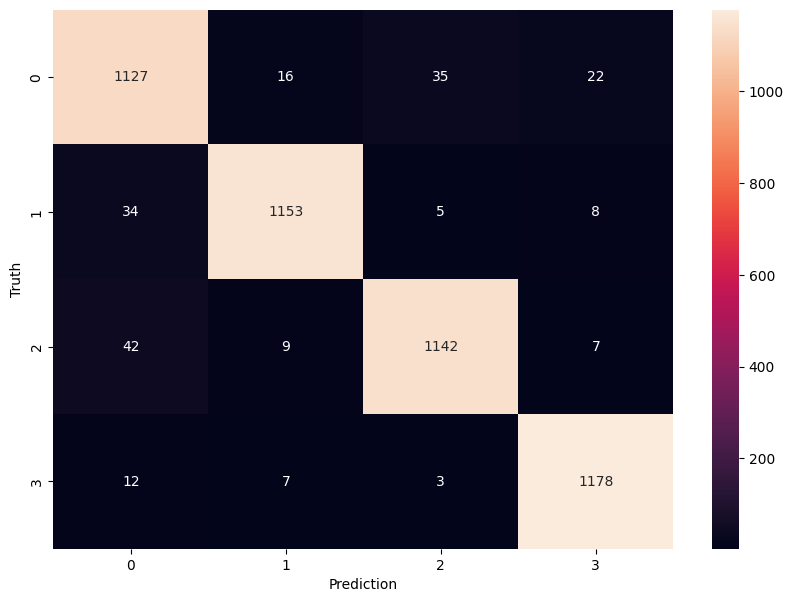

In [110]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')